# Exploratory Data Analysis

Exploratory Data Analysis (EDA) is the process of analyzing and visualizing data sets to summarize their main characteristics, often with the help of graphical representations. EDA is typically the first step in any data analysis or machine learning project, helping you to understand the structure and patterns of the data before applying any advanced modeling techniques.

#### 1. Import the required python libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import ggplot, aes, geom_bar, theme, element_text, labs, theme_minimal
import patchworklib as pw

C:\Users\amban\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\amban\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


<Figure size 100x100 with 0 Axes>

#### 2. Reading data from CSV to a dataframe "df" using Pandas

In [2]:
df=pd.read_csv("Test_data.csv")
df.head(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
5,46232,Procurement,region_7,Bachelor's,m,sourcing,1,36,3.0,2,0,0,68
6,54542,Finance,region_2,Bachelor's,m,other,1,33,5.0,3,1,0,57
7,67269,Analytics,region_22,Bachelor's,m,sourcing,2,36,3.0,3,0,0,85
8,66174,Technology,region_7,Master's & above,m,other,1,51,4.0,11,0,0,75
9,76303,Technology,region_22,Bachelor's,m,sourcing,1,29,5.0,2,1,0,76


In [3]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

### 3. Check for Null Values

In [4]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

#### 4. Check for Duplicate Values

In [5]:
print(df.duplicated())
print("\nTotal Duplicate Rows: ", df.duplicated().sum())

0        False
1        False
2        False
3        False
4        False
         ...  
23485    False
23486    False
23487    False
23488    False
23489    False
Length: 23490, dtype: bool

Total Duplicate Rows:  0


#### 5. Drop Rows with any Missing Values

In [6]:
df = df.dropna() 

In [7]:
df.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

#### 6. Count Plots for Categorical Features

In [8]:
def plot_count(data, column, title):
    clean_col = column.replace("_", " ").replace(">", "> ").replace("?", "")

    # Build ggplot object
    p=(
        ggplot(data, aes(x=column, fill=column)) +
        geom_bar(show_legend=False) +
        labs(title=f"Distribution of {clean_col}", x=clean_col, y="Count") +
        theme_minimal()+
        theme(
            figure_size=(7, 5),
            axis_text_x=element_text(rotation=40, ha="right", size=9), 
            axis_text_y=element_text(size=9),
            plot_title=element_text(size=14, weight="bold"),
            axis_title_x=element_text(size=11, weight="bold"),
            axis_title_y=element_text(size=11, weight="bold")
        )
    )
    return p

In [9]:
plots=[]
categorical_cols=['department', 'region', 'education', 'gender', 'recruitment_channel', 'KPIs_met >80%', 'awards_won?']
for col in categorical_cols:
    plots.append(plot_count(df, col, f"Distribution of{col}"))

#### 7. Arrange the plots in rows 

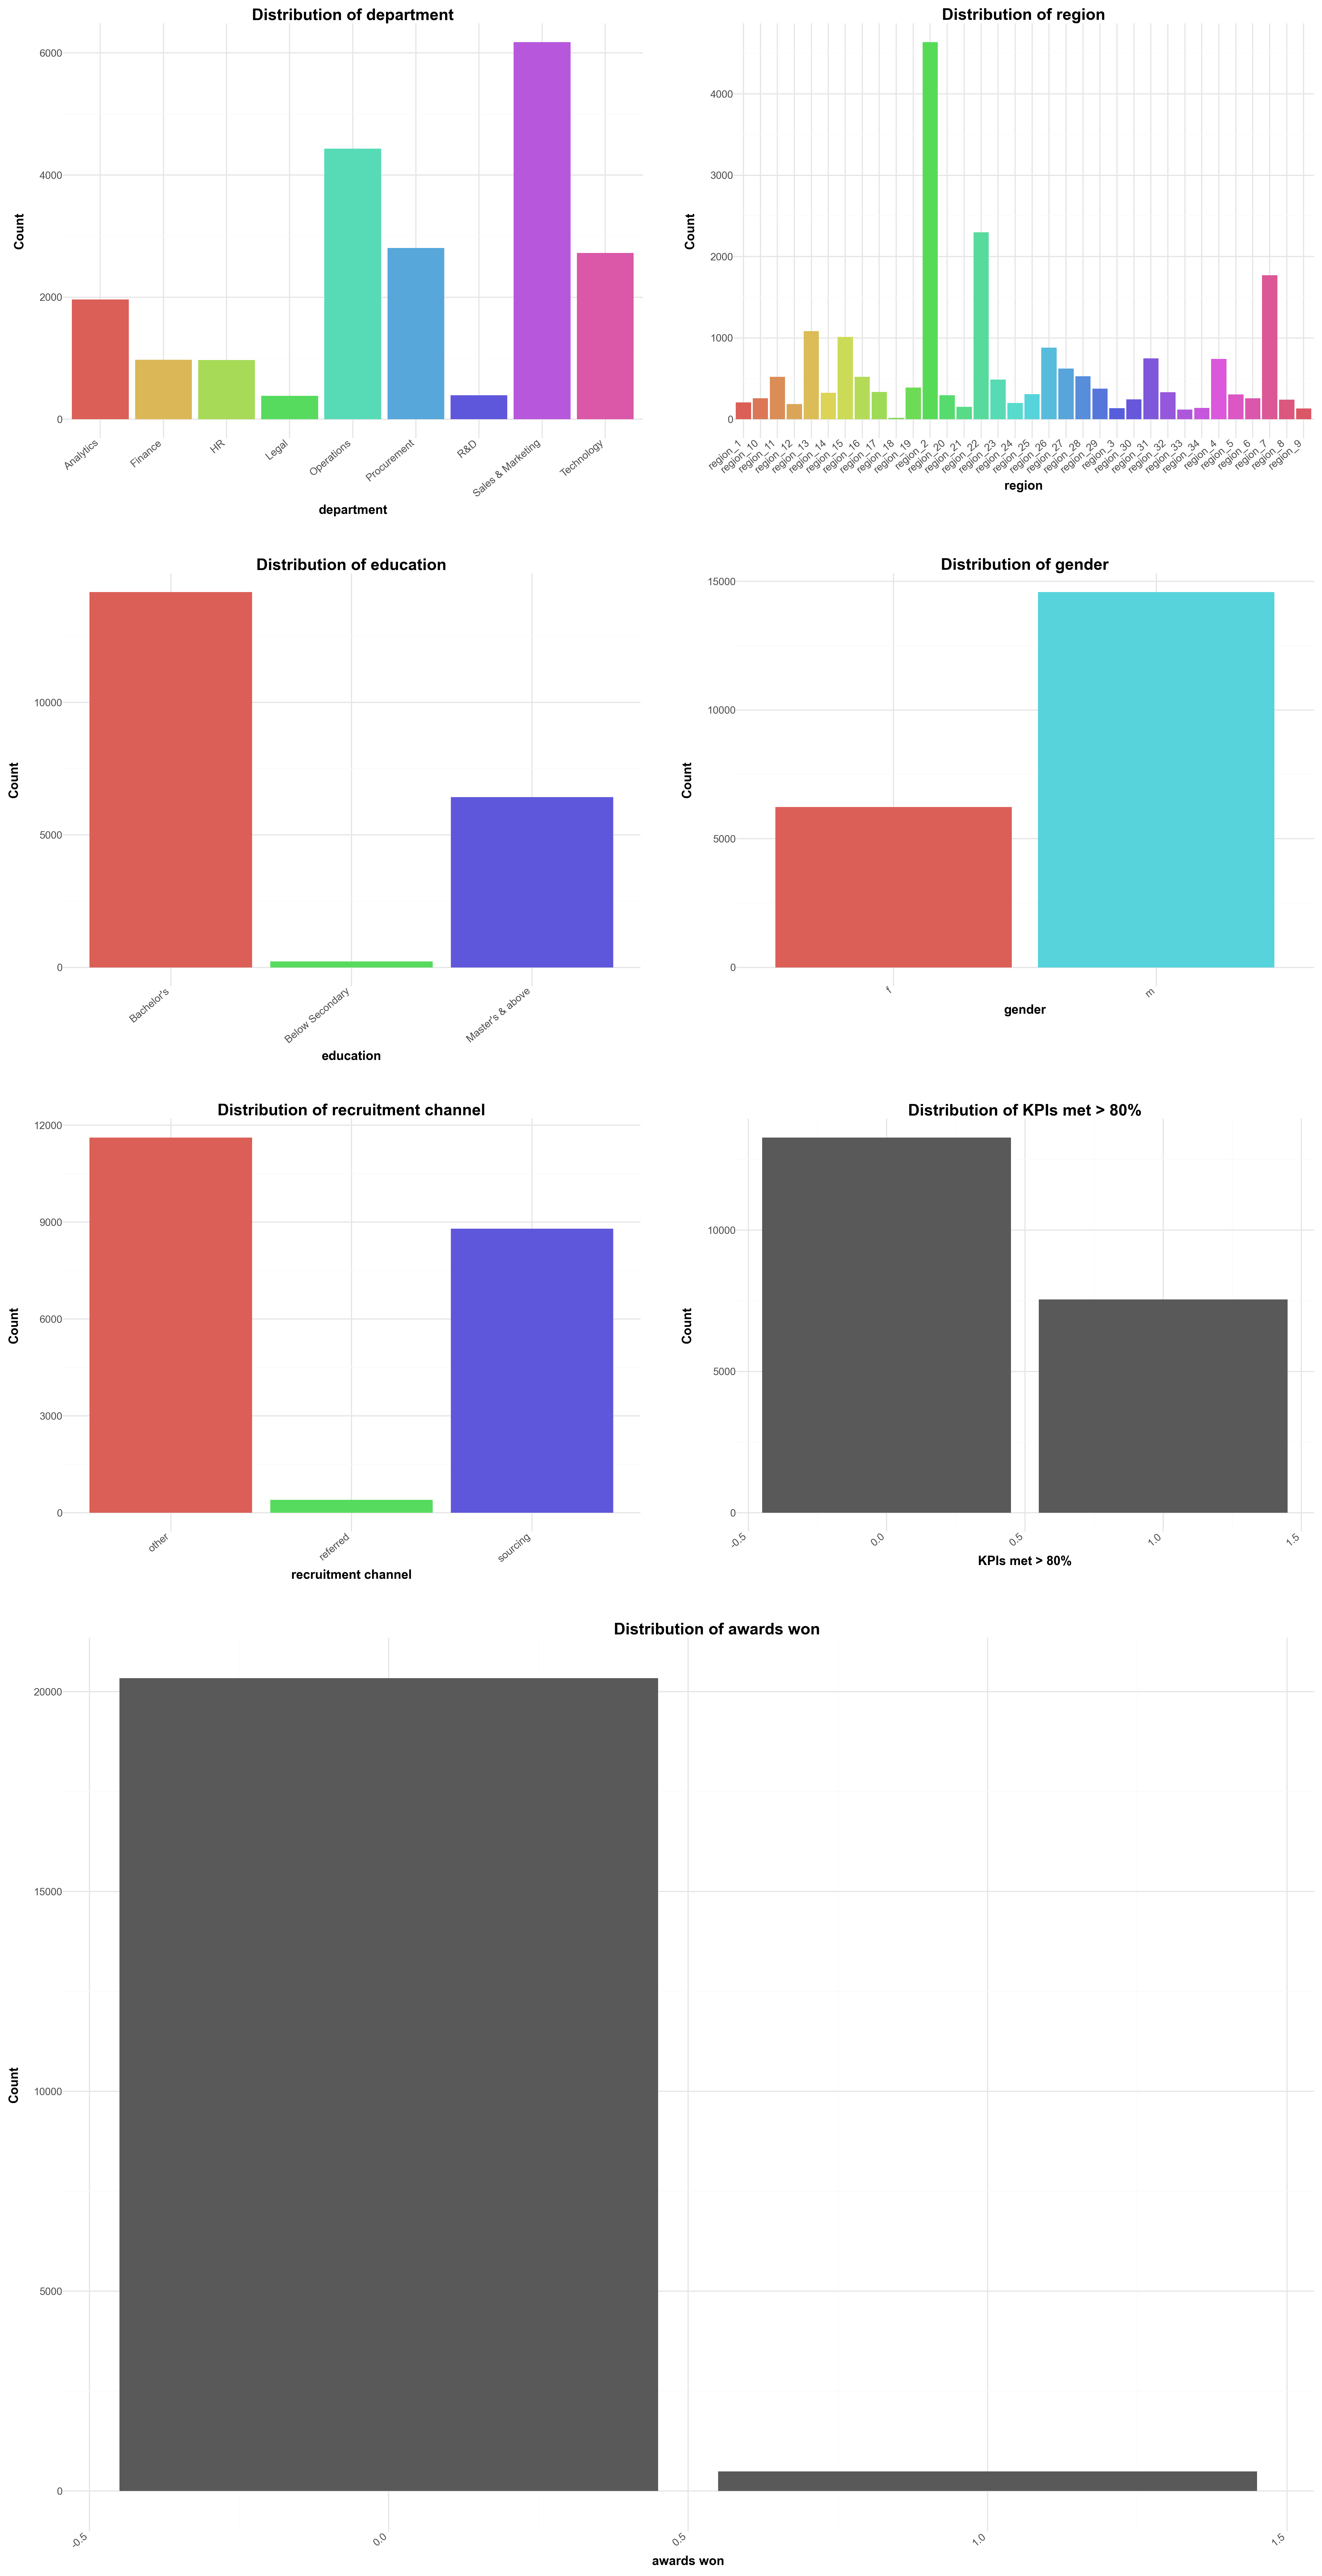

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [11]:
# First row (2 plots)
row1 = pw.load_ggplot(plots[0]) | pw.load_ggplot(plots[1])

# Second row (2 plots)
row2 = pw.load_ggplot(plots[2]) | pw.load_ggplot(plots[3])

# Third row (2 plots)
row3 = pw.load_ggplot(plots[4]) | pw.load_ggplot(plots[5])

# Fourth row (last plot centered)
row4 = pw.load_ggplot(plots[6])

# Combine into grid
grid = row1 / row2 / row3 / row4

# Save & show
grid.savefig("categorical_dashboard_2xN.png", dpi=300)
grid